In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('Clothing.csv')
df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [12]:
#select data
columns = ['tsales','margin','nown','inv1','inv2','ssize','start']
df = df[columns]
df.head(1)

,tsales,margin,nown,inv1,inv2,ssize,start
0,750000,41.0,1.0,17166.67,27177.04,170,41.0


# data analysis

In [13]:
df.describe()

,tsales,margin,nown,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,38.774230,1.283796,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,5.218184,0.639773,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,16.000000,1.000000,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,37.000000,1.000000,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,39.000000,1.000000,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,41.000000,1.295225,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,66.000000,10.000000,1.500000e+06,400000.000000,1214.000000,90.000000


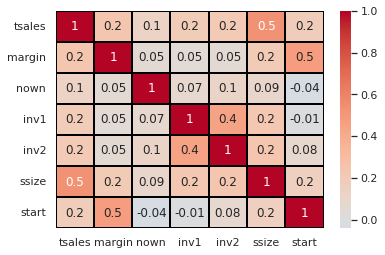

In [16]:
#correlation Matrix
sns.set(font_scale=1)
sns.heatmap(df.corr(),
            annot=True,
            fmt='.1g',
            center=0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black')

#Multilinear regression prepare

In [17]:
#prepare X and y
y = df.tsales / 1000
X = df.drop(columns=['tsales'])
X = sm.add_constant(X)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)

In [21]:
# model creation
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 tsales   R-squared (uncentered):                   0.779
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                              184.0
Date:                Sun, 18 Sep 2022   Prob (F-statistic):                    1.25e-99
Time:                        09:20:51   Log-Likelihood:                         -4635.5
No. Observations:                 320   AIC:                                      9283.
Df Residuals:                     314   BIC:                                      9306.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
predictions = model.predict(X_test)
predictions.head()

270    1.621208e+06
380    7.854196e+05
326    6.916436e+05
60     6.423932e+05
316    3.515756e+05
dtype: float64

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'RSME: {np.sqrt(mean_squared_error(y_test, predictions))}')

MAE: 351329.29963328736
RSME: 532642.6907197274
